In [22]:
import csv
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from scipy import stats
import math
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
import pg8000
import sys
import os
import pathlib2
import warnings
warnings.filterwarnings('ignore')

In [23]:
mdata = pd.read_csv("../data/mouse_smart_data.csv")
mdata

,recording_date,anno.res_index_label,code,drivers,cell_name,patched_cell_container,63x_call
0,2018-01-02,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,P8S4_180102_351_A01,63x go
1,2018-01-02,0.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,P8S4_180102_352_A01,NaN
2,2018-01-02,0.745543,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,P8S4_180102_353_A01,NaN
3,2018-01-02,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,P9S4_180102_401_A01,63x go
4,2018-01-02,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,P9S4_180102_402_A01,63x no go
5,2018-01-02,1.000000,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,P9S4_180102_403_A01,63x go
6,2018-01-03,0.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.01,P8S4_180103_351_A01,NaN
7,2018-01-03,1.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.02,P8S4_180103_352_A01,63x no go
8,2018-01-03,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.05.02.01,PAS4_180103_451_A01,63x no go
9,2018-01-03,0.784887,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.04.02.01,PAS4_180103_452_A01,63x go


In [24]:
d = {}

In [25]:
d['Gad2-IRES-Cre'] = 'Pan-inhibitory'
d['Rbp4-Cre_KL100'] = 'Layer 5 enriched'
d['Slc32a1-IRES-Cre'] = 'Pan-inhibitory'
d['Vip-IRES-Cre'] = 'Vip'
d['Sst-IRES-Cre'] = 'Sst'
d['Pvalb-IRES-Cre'] = 'PV'
d['Ndnf-IRES2-dgCre'] = 'Lamp5'
d['Chrna2-Cre_OE25'] = 'Sst'
d['Chat-IRES-Cre-neo'] = 'Vip'
d['Rorb-IRES2-Cre'] = 'Layer 4, 5 enriched'
d['Oxtr-T2A-Cre'] = 'Mixed expression'
d['Ntsr1-Cre_GN220'] = 'Layer 6 enriched'
d['Scnn1a-Tg2-Cre'] = 'Layer 4, 5 enriched'
d['Htr3a-Cre_NO152'] ='Vip'
d['Ctgf-T2A-dgCre'] = 'Layer 6 enriched'
d['Cux2-CreERT2'] = 'Layer 2/3, 4 enriched'
d['Scnn1a-Tg3-Cre'] = 'Layer 4, 5 enriched'
d['Pdyn-T2A-CreERT2'] = 'Sst'
d['Nr5a1-Cre'] = 'Layer 2/3, 4 enriched'
d['Nos1-CreERT2'] = 'Mixed expression'
d['Pvalb-T2A-FlpO Vipr2-IRES2-Cre'] = 'PV'
d['Ndnf-IRES2-dgCre; Slc32a1-IRES2-FlpO'] = 'Lamp5'
d['Nos1-CreERT2 Sst-IRES-FlpO'] = 'Sst'
d['Slc17a6-IRES-Cre'] = 'Pan-excitatory'
d['Slc32a1-T2A-FlpO Vipr2-IRES2-Cre'] = 'PV'
d['Crh-IRES-Cre_ZJH; Sst-IRES-FlpO'] = 'Sst'
d['Slc17a8-IRES2-Cre Slc32a1-IRES2-FlpO'] = 'Mixed expression'
d['Sim1-Cre_KJ18'] = 'Layer 5 enriched'
d['Th-Cre_FI172'] = 'PV'
d['Tlx3-Cre_PL56'] = 'Layer 5 enriched'
d['Rorb-IRES2-Cre-neo'] = 'Layer 4, 5 enriched'
d['Nkx2-1-CreERT2'] = 'PV' 
d['Vipr2-IRES2-Cre'] = 'Mixed expression'
d['Slc17a8-iCre'] = 'Mixed expression'
d['Th-P2A-FlpO'] = 'PV'
d['Oxtr-T2A-Cre; Pvalb-T2A-FlpO'] = 'PV'
d['Sst-IRES-FlpO; Tac1-IRES2-Cre'] = 'Sst'
d['Chrna2-Cre_OE25; Pvalb-T2A-FlpO'] = 'PV'
d['Glt25d2-Cre_NF107'] = 'Layer 5 enriched'
d['Etv1-CreERT2; Pvalb-T2A-FlpO'] = 'PV'
d['Slc17a8-IRES2-Cre'] = 'Mixed expression'
d['Penk-IRES2-Cre-neo'] = 'Mixed expression'
d['Npr3-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Calb1-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrna2-Cre_OE25; Vip-IRES-FlpO'] = 'Vip'
d['Sst-IRES-FlpO; Tac2-IRES2-Cre'] = 'Sst' 
d['Sst-Cre'] = 'Sst'
d['Npy-IRES2-FlpO'] = 'unknown'
d['Esr2-IRES2-Cre'] = 'unknown'
d['Pvalb-T2A-FlpO; Slc32a1-IRES-Cre'] = 'unknown'
d['Esr2-IRES2-Cre-neo; PhiC31-neo'] = 'unknown'
d['EE609-lacZ-CreERT2-Tg2'] = 'unknown'
d['Gng7-Cre_KH71'] = 'unknown'
d['Ntng2-IRES2-Cre'] = 'unknown'
d['Pvalb-T2A-FlpO; Tlx3-Cre_PL56'] = 'unknown'
d['Erbb4-T2A-CreERT2'] = 'unknown'
d['Htr3a-Cre_NO152; Pvalb-T2A-Dre'] = 'unknown'
d['Pvalb-T2A-FlpO; Sst-IRES-Cre'] = 'unknown'
d['Slc32a1-IRES2-FlpO'] = 'unknown'
d['Snap25-IRES2-Cre'] = 'unknown'
d['Ndnf-IRES2-dgCre; Slc17a6-IRES2-FlpO'] = 'unknown'
d['Pvalb-IRES-Cre; Rorb-T2A-tTA2'] = 'unknown' 
d['Cart-IRES2-Cre'] = 'unknown'
d['Slc17a7-IRES2-Cre'] = 'unknown'
d['Nos1-CreERT2; Sst-IRES-FlpO'] = 'Sst'
d['Calb2-IRES-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Tac1-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrna2-Cre_OE25; Sst-IRES-FlpO'] = 'Sst'
d['Etv1-CreERT2; Sst-IRES-FlpO'] = 'Sst'
d['Etv1-CreERT2; Pvalb-IRES-FlpO'] = 'PV'
d['Tac2-IRES2-Cre; Sst-IRES-FlpO'] = 'Sst'
d['Chrnb3'] = 'Sst'
d['Chrnb3-Cre;Sst-IRES-FlpO'] = 'Sst'
d['Pvalb-T2A-Cre; Chrna2-Cre_OE25'] = 'PV'
d['Th-Cre_FI172; Sst-IRES-FlpO'] = 'Sst'
d['Vipr2-IRES2-Cre; Slc32a1-T2A-FlpO'] = 'PV'
d['Vipr2-IRES2-Cre; Pvalb-T2A-FlpO'] = 'PV'
d['Htr3a-Cre_NO152; Pvalb-T2A-FlpO'] = 'unknown'
d['Htr3a-Cre_NO152; Sst-IRES-FlpO'] = 'unknown'
d['Cck-IRES-Cre; Vip-IRES-FlpO'] = 'Vip'
d['Vip-IRES-Cre; Npy-IRES2-FlpO'] = 'Vip'
d['Slc17a8-IRES2-Cre; Slc32a1-IRES2-FlpO'] = 'Mixed expression'
d['Penk-IRES2-Cre-neo; Slc17a6-IRES2-FlpO'] = 'Layer 6 enriched'

In [26]:
mdata['family'] = mdata['drivers'].map(d)
mdata

,recording_date,anno.res_index_label,code,drivers,cell_name,patched_cell_container,63x_call,family
0,2018-01-02,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.01,P8S4_180102_351_A01,63x go,Vip
1,2018-01-02,0.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.04.02.02,P8S4_180102_352_A01,NaN,Vip
2,2018-01-02,0.745543,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.05.02.01,P8S4_180102_353_A01,NaN,Vip
3,2018-01-02,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.04.01.01,P9S4_180102_401_A01,63x go,Sst
4,2018-01-02,1.000000,mIVSCC-MET,Chat-IRES-Cre-neo,Chat-IRES-Cre-neo;Ai14-365769.03.01.01,P9S4_180102_402_A01,63x no go,Vip
5,2018-01-02,1.000000,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366659.05.01.01,P9S4_180102_403_A01,63x go,Sst
6,2018-01-03,0.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.01,P8S4_180103_351_A01,NaN,NaN
7,2018-01-03,1.000000,mIVSCC-MET,Calb1-IRES2-Cre Sst-IRES-FlpO,Calb2-IRES-Cre;Sst-IRES-FlpO;Ai65-366183.04.02.02,P8S4_180103_352_A01,63x no go,NaN
8,2018-01-03,0.880454,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.05.02.01,PAS4_180103_451_A01,63x no go,Sst
9,2018-01-03,0.784887,mIVSCC-MET,Pdyn-T2A-CreERT2,Pdyn-T2A-CreERT2;Ai14-366660.04.02.01,PAS4_180103_452_A01,63x go,Sst


In [28]:
mdata = mdata[['drivers','family']]
mdata = mdata.groupby(['family']).count().reset_index()

mdata

,family,drivers
0,Lamp5,72
1,"Layer 2/3, 4 enriched",56
2,"Layer 4, 5 enriched",11
3,Layer 5 enriched,89
4,Layer 6 enriched,20
5,Mixed expression,118
6,PV,224
7,Pan-excitatory,16
8,Pan-inhibitory,102
9,Sst,557


## Pie chart

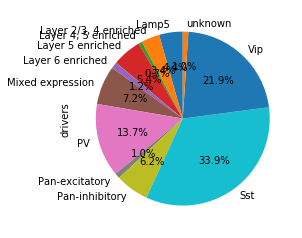

In [49]:
ax1 = plt.subplot(111, aspect='equal')
mdata.plot(kind='pie', y = 'drivers', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=mdata['family'], legend = False)
#plt.figure(figsize=(16,8))

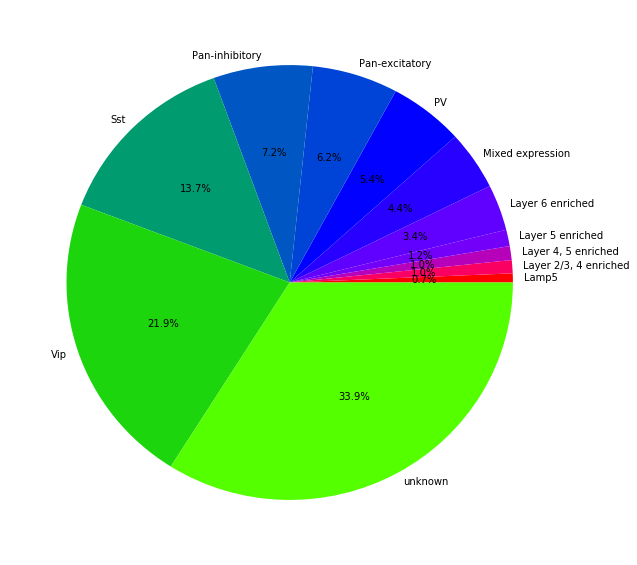

In [72]:
slices = mdata['drivers']
labels = mdata['family']

slices = sorted(slices)

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(slices)))

ax.pie(slices, colors=colors, labels=labels, labeldistance=1.05, autopct='%1.1f%%')
plt.show()

In [ ]:
for key, value in d.items():
    print("Driver:")
    print(key)
    print("Family:")
    print(value)
    print("")